In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,classification_report

In [2]:
tdf=pd.read_csv("C:/Users/ADMIN/Downloads/Fake.csv")
fdf=pd.read_csv("C:/Users/ADMIN/Downloads/True.csv")

In [3]:
tdf

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
fdf

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
print(tdf.info())
print(fdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [6]:
print(tdf.columns)
print(fdf.columns)

Index(['title', 'text', 'subject', 'date'], dtype='object')
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [7]:
tdf.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
fdf.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
tdf['class']=0
tdf.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
fdf['class']=1
fdf.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
data_merge=pd.concat([tdf,fdf],axis=0)
data_merge

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [12]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [13]:
df=data_merge.drop(['title','subject','date'],axis=1)
df.tail(10)

,text,class
21407,"SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",1
21408,GENEVA (Reuters) - North Korea and the United ...,1
21409,GENEVA (Reuters) - North Korea and the United ...,1
21410,COPENHAGEN (Reuters) - Danish police said on T...,1
21411,UNITED NATIONS (Reuters) - Two North Korean sh...,1
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1
21416,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,1


In [14]:
df=df.sample(frac=1)

In [15]:
df

,text,class
7983,"SACRAMENTO, Calif. (Reuters) - California Gove...",1
13920,ANKARA (Reuters) - Iran said on Thursday that ...,1
10452,(Reuters) - Democratic senators in Missouri we...,1
12033,Obama has been low key in the past few months ...,0
9086,NEW YORK (Reuters) - After successfully fundin...,1
...,...,...
15066,Fournier totally hammers these two-great to see!,0
12767,HANOI (Reuters) - Vietnam s government has pro...,1
19860,TUNIS (Reuters) - Hundreds of Tunisians protes...,1
2287,WASHINGTON (Reuters) - U.S. Secretary of State...,1


In [16]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [17]:
df

,text,class
0,"SACRAMENTO, Calif. (Reuters) - California Gove...",1
1,ANKARA (Reuters) - Iran said on Thursday that ...,1
2,(Reuters) - Democratic senators in Missouri we...,1
3,Obama has been low key in the past few months ...,0
4,NEW YORK (Reuters) - After successfully fundin...,1
...,...,...
44893,Fournier totally hammers these two-great to see!,0
44894,HANOI (Reuters) - Vietnam s government has pro...,1
44895,TUNIS (Reuters) - Hundreds of Tunisians protes...,1
44896,WASHINGTON (Reuters) - U.S. Secretary of State...,1


In [18]:
df.shape

(44898, 2)

In [19]:
df.describe()

,class
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# preprocessing textdata

In [20]:
def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [21]:
df['text']=df['text'].apply(wordopt)

# data visualisation

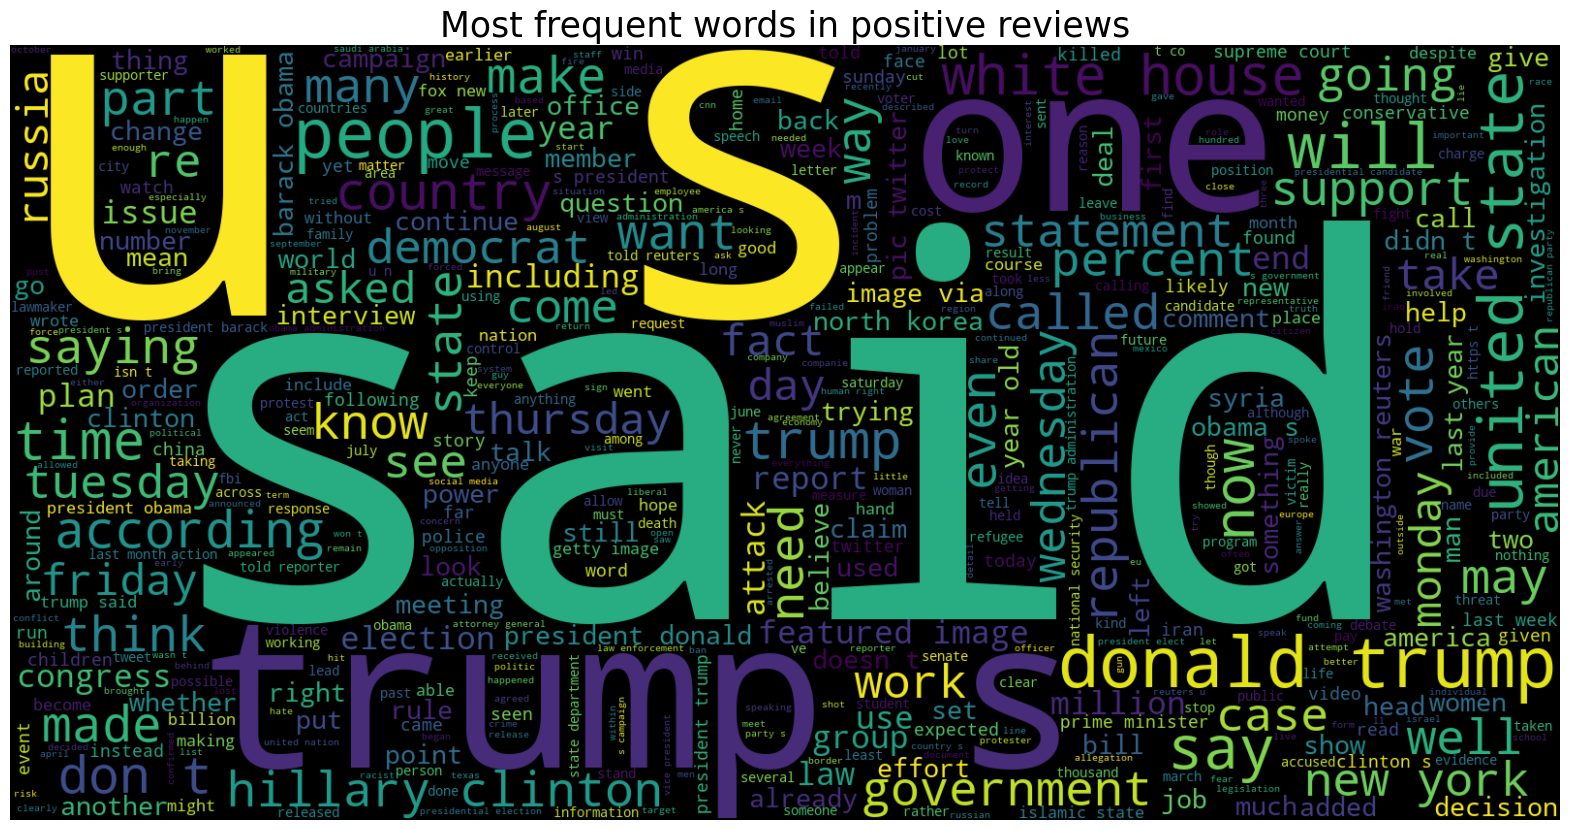

In [22]:
text=' '.join([word for word in df['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=25)
plt.show()

In [23]:
x=df['text']
y=df['class']

In [24]:
x

0        sacramento  calif   reuters    california gove...
1        ankara  reuters    iran said on thursday that ...
2         reuters    democratic senators in missouri we...
3        obama has been low key in the past few months ...
4        new york  reuters    after successfully fundin...
                               ...                        
44893    fournier totally hammers these two great to see  
44894    hanoi  reuters    vietnam s government has pro...
44895    tunis  reuters    hundreds of tunisians protes...
44896    washington  reuters    u s  secretary of state...
44897    so words deemed offensive are only offensive i...
Name: text, Length: 44898, dtype: object

In [25]:
y

0        1
1        1
2        1
3        0
4        1
        ..
44893    0
44894    1
44895    1
44896    1
44897    0
Name: class, Length: 44898, dtype: int64

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=.2)

In [27]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(35918,) (8980,) (35918,) (8980,)


# NLP

In [28]:
vector=TfidfVectorizer()
xv_train=vector.fit_transform(xtrain)
xv_test=vector.transform(xtest)
print(xv_train)
print(xv_test)

  (0, 17012)	0.026949106327866394
  (0, 13135)	0.027381261367335808
  (0, 40634)	0.02903496244105099
  (0, 86385)	0.025112061015934026
  (0, 76817)	0.02090385843082285
  (0, 41087)	0.0220806635582958
  (0, 37720)	0.02974364065078775
  (0, 4359)	0.009790351936037597
  (0, 69933)	0.032324884002311434
  (0, 94482)	0.016051116045768223
  (0, 59835)	0.028814993277039996
  (0, 61168)	0.0409618534029894
  (0, 1498)	0.03039267407619157
  (0, 53654)	0.05000751583466192
  (0, 29768)	0.03465678285140143
  (0, 74450)	0.03666510302250936
  (0, 66385)	0.08567504101651552
  (0, 67509)	0.023823434593101496
  (0, 11882)	0.029256576644774164
  (0, 2950)	0.019562927177683397
  (0, 61167)	0.11081653801438059
  (0, 40680)	0.027304196553676968
  (0, 28104)	0.022118972105705154
  (0, 66332)	0.027943077192617367
  (0, 67710)	0.023013181629272815
  :	:
  (35917, 3256)	0.12261315746337714
  (35917, 95209)	0.04476362958611097
  (35917, 94576)	0.017368705400389775
  (35917, 40456)	0.06897567616706878
  (35917, 59

In [29]:
per1=Perceptron(n_iter_no_change=100,eta0=0.1)
model_per1=per1.fit(xv_train,ytrain)
pred1=model_per1.predict(xv_test)
pred1

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [30]:
print(accuracy_score(pred1,ytest))
print(classification_report(pred1,ytest))

0.9939866369710467
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4664
           1       0.99      0.99      0.99      4316

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [31]:
per2=Perceptron(n_iter_no_change=100,eta0=0.01)
model_per2=per2.fit(xv_train,ytrain)
pred2=model_per2.predict(xv_test)
pred2

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [34]:
print(accuracy_score(pred2,ytest))
print(classification_report(pred2,ytest))

0.9939866369710467
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4664
           1       0.99      0.99      0.99      4316

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [33]:
per3=Perceptron(n_iter_no_change=100,eta0=0.001)
model_per3=per3.fit(xv_train,ytrain)
pred3=model_per3.predict(xv_test)
pred3

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [35]:
print(accuracy_score(pred3,ytest))
print(classification_report(pred3,ytest))

0.994097995545657
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4663
           1       1.00      0.99      0.99      4317

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

